In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
data = pd.read_csv('customer.csv')

# Create a list of [latitude, longitude] pairs from the dataset
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]

# Create a Folium map object centered on Singapore (approximate central coordinates)
sg_map = folium.Map(location=[1.357, 103.819], zoom_start=12)

# Add a heat map layer to the map
HeatMap(heat_data).add_to(sg_map)

# Save the map to an HTML file
sg_map.save('singapore_heatmap.html')

print("Heat map generated and saved as 'singapore_heatmap.html'")


Heat map generated and saved as 'singapore_heatmap.html'


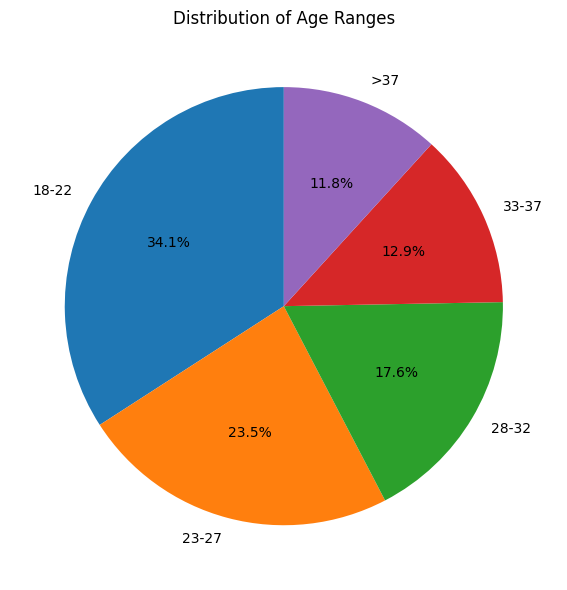

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("customer.csv")

# ---------------------------
# 1. Pie Chart: Distribution of Age Ranges
# ---------------------------
age_counts = data["Age_Range"].value_counts()
plt.figure(figsize=(6,6))
age_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Age Ranges")
plt.ylabel("")  # Remove y-label for a cleaner look
plt.tight_layout()
plt.show()

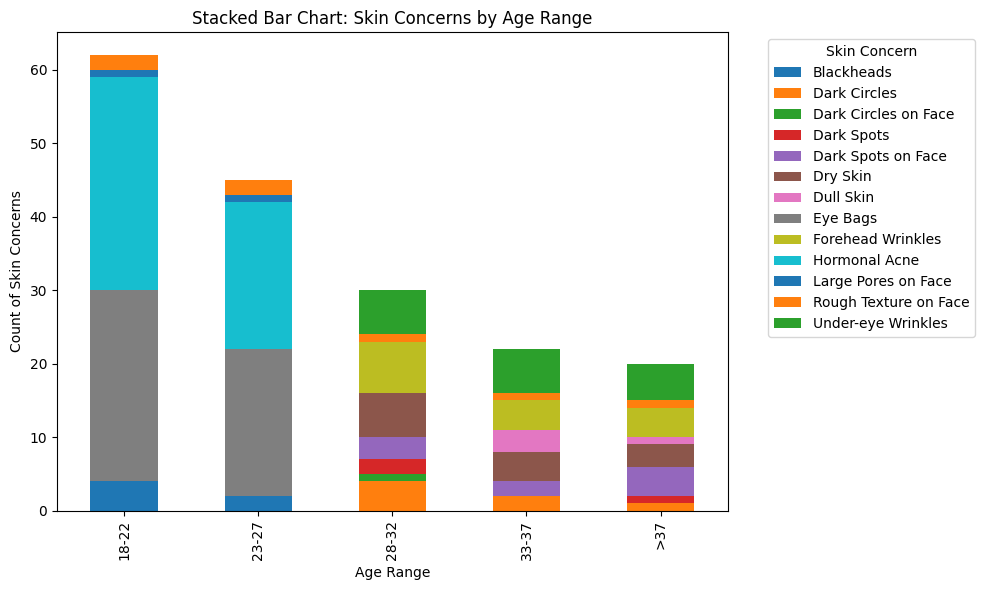

In [13]:
# ---------------------------
# 2. Stacked Bar Chart: Skin Concerns by Age Range
# ---------------------------
# Use get_dummies to split the Skin_Concerns column based on the separator ", "
skin_dummies = data["Skin_Concerns"].str.get_dummies(sep=", ")

# Combine the dummies with the original Age_Range column
data_with_dummies = pd.concat([data["Age_Range"], skin_dummies], axis=1)

# Group by Age_Range and sum up the counts for each skin concern
concerns_by_age = data_with_dummies.groupby("Age_Range").sum()

# Plot the stacked bar chart
concerns_by_age.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Stacked Bar Chart: Skin Concerns by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Count of Skin Concerns")
plt.legend(title="Skin Concern", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

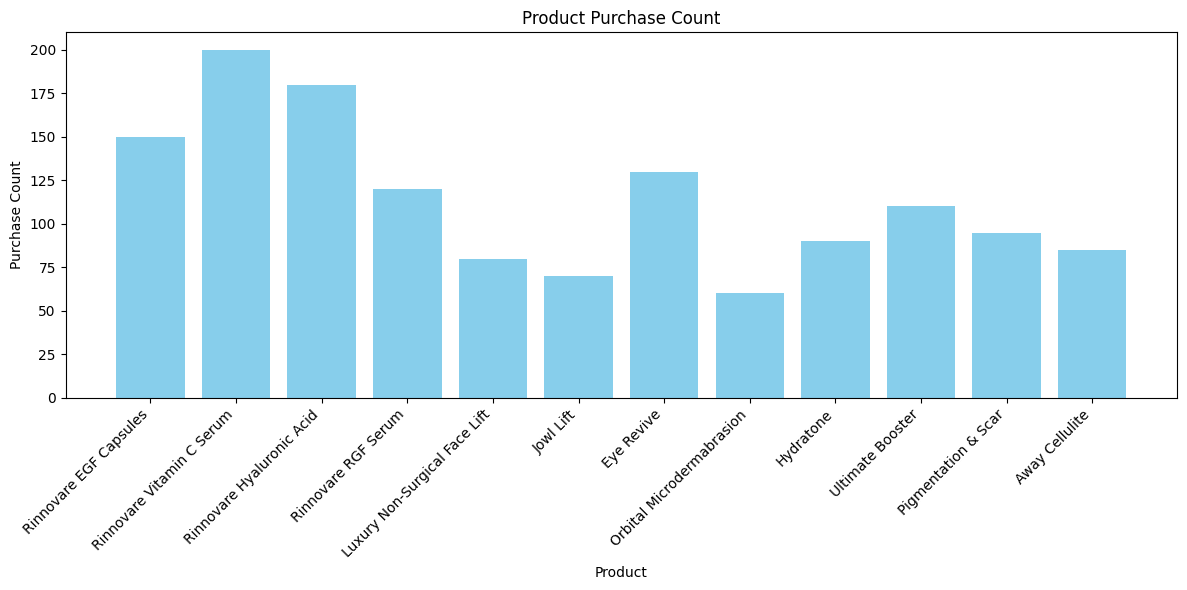

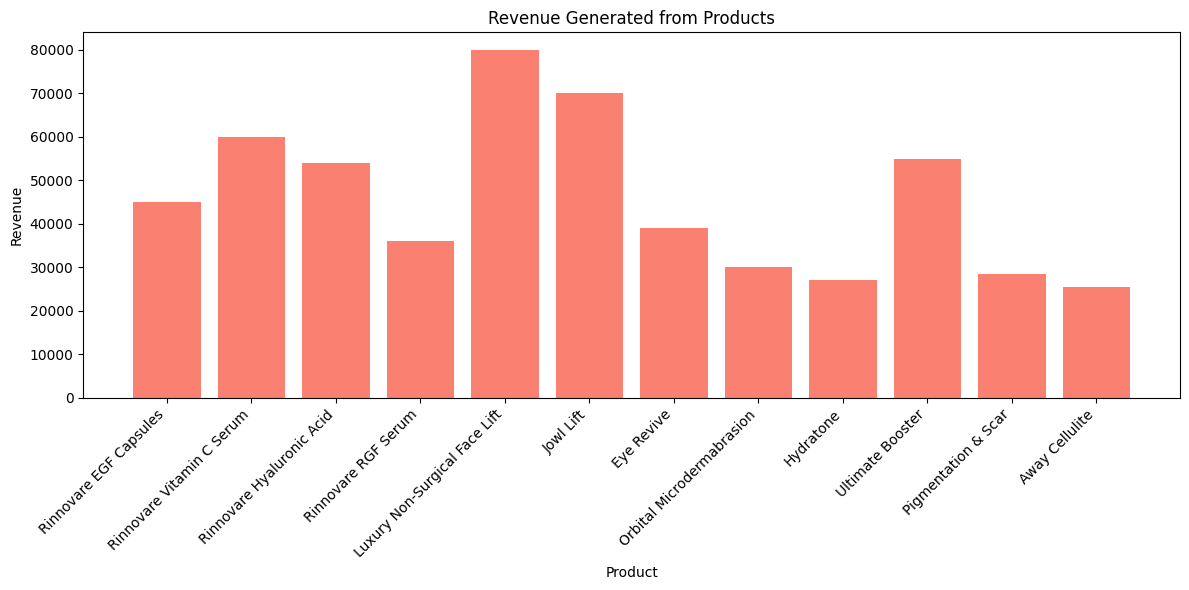

C:\Users\limke_msg9rxa\AppData\Local\Temp\ipykernel_45356\3752561623.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data["Product"], rotation=45, ha='right')


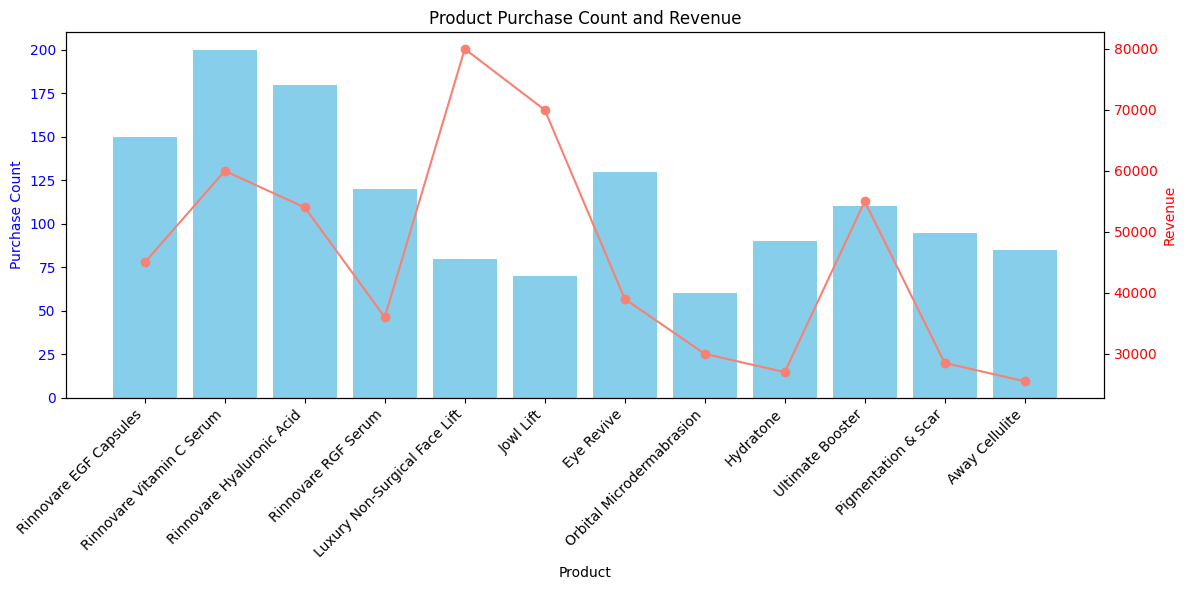

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data (ensure the CSV filename and path are correct)
data = pd.read_csv("products.csv")

# ---------------------------
# 1. Bar Chart: Product Purchase Count
# ---------------------------
plt.figure(figsize=(12, 6))
plt.bar(data["Product"], data["Purchase_Count"], color='skyblue')
plt.title("Product Purchase Count")
plt.xlabel("Product")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Bar Chart: Revenue Generated from Products
# ---------------------------
plt.figure(figsize=(12, 6))
plt.bar(data["Product"], data["Revenue"], color='salmon')
plt.title("Revenue Generated from Products")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------------------------
# Optional: Combined Dual-Axis Chart
# ---------------------------
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Purchase Count
ax1.bar(data["Product"], data["Purchase_Count"], color='skyblue', label="Purchase Count")
ax1.set_xlabel("Product")
ax1.set_ylabel("Purchase Count", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(data["Product"], rotation=45, ha='right')

# Create a twin Axes sharing the xaxis for Revenue
ax2 = ax1.twinx()
ax2.plot(data["Product"], data["Revenue"], color='salmon', marker='o', label="Revenue")
ax2.set_ylabel("Revenue", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Product Purchase Count and Revenue")
fig.tight_layout()
plt.show()
